In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from import_file import *

# 0. Combining Files

In [2]:
# file_dir, save_file_dir  = 'TOP' , 'TOP'
# file_dir, save_file_dir = 'DEN', './data/asos/denver'

# file_dir, save_file_dir = 'BIS', './data/asos/bismarck_ND'
# file_dir, save_file_dir = 'ABR', './data/asos/aberdeen_SD' # only to 2012
file_dir, save_file_dir = 'MSP', './data/asos/minneapolis'

# file_dir, save_file_dir = 'DSM', './data/asos/des_moines_IA'
# file_dir, save_file_dir = 'SPI', './data/asos/springfield_IL'
# file_dir, save_file_dir = 'LNK', './data/asos/lincoln_NE'

In [3]:
from io import StringIO

fout = StringIO()
# fout=open(save_file_dir + "/all.dat","w")
for year in range(2000,2017):
    for month in range(1,13):
        try: 
            for line in open('D:/1min采样间隔的数据/'+ str(year) + '/'+ file_dir +str(year)+"%02d"%(month)+".dat"):
                fout.write(line.replace("[", " ").replace("]", " ").replace('"', " ").replace('`', " "))
        except: 
            pass
all_data_file = fout.getvalue()
fout.close()

# 1. Read from US 1 min

In [4]:
if file_dir in ["MSP", 'DEN']: 
    df = pd.read_csv(StringIO(all_data_file), skipinitialspace=True, error_bad_lines=False, sep=' ',
                    names = ['stationID','time','vis','day_type','vis2','day_type2','dir','speed','dir_max','speed_max','visual_range', 'unknown'])
else:
    df = pd.read_csv(StringIO(all_data_file), skipinitialspace=True, sep=' ', error_bad_lines=False,
                    names = ['stationID','time','vis','day_type','dir','speed','dir_max','speed_max','unname','visual_range', 'unknown'])

df

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2,4,6,7,8,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stationID,time,vis,day_type,vis2,day_type2,dir,speed,dir_max,speed_max,visual_range,unknown
0,14922KMSP,MSP2000010100000600,0.073,N,0.08,N,255,7,260,9,30L60+,NaN
1,14922KMSP,MSP2000010100010601,0.074,N,0.082,N,254,8,249,8,30L60+,NaN
2,14922KMSP,MSP2000010100020602,0.074,N,0.081,N,253,7,256,8,30L60+,NaN
3,14922KMSP,MSP2000010100030603,0.073,N,0.087,N,252,7,248,8,30L60+,NaN
4,14922KMSP,MSP2000010100040604,0.073,N,0.082,N,249,7,246,8,30L60+,NaN
5,14922KMSP,MSP2000010100050605,0.074,N,0.08,N,245,8,246,8,30L60+,NaN
6,14922KMSP,MSP2000010100060606,0.072,N,0.079,N,245,8,258,9,30L60+,NaN
7,14922KMSP,MSP2000010100070607,0.072,N,0.078,N,248,8,253,9,30L60+,NaN
8,14922KMSP,MSP2000010100080608,0.073,N,0.081,N,250,8,252,10,30L60+,NaN
9,14922KMSP,MSP2000010100090609,0.073,N,0.08,N,250,8,253,10,30L60+,NaN


In [5]:
# Drop duplicate
df.drop_duplicates(subset='time', inplace=True)

# Drop too many field
df = df[df['unknown'].isnull()]
df.drop('unknown', axis=1, inplace=True)

# Drop missing field
# Cannot use visual range, since some previous data lack of
df.dropna(subset=['vis', 'dir','speed','dir_max','speed_max'], inplace=True)

df

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,stationID,time,vis,day_type,vis2,day_type2,dir,speed,dir_max,speed_max,visual_range
0,14922KMSP,MSP2000010100000600,0.073,N,0.08,N,255,7,260,9,30L60+
1,14922KMSP,MSP2000010100010601,0.074,N,0.082,N,254,8,249,8,30L60+
2,14922KMSP,MSP2000010100020602,0.074,N,0.081,N,253,7,256,8,30L60+
3,14922KMSP,MSP2000010100030603,0.073,N,0.087,N,252,7,248,8,30L60+
4,14922KMSP,MSP2000010100040604,0.073,N,0.082,N,249,7,246,8,30L60+
5,14922KMSP,MSP2000010100050605,0.074,N,0.08,N,245,8,246,8,30L60+
6,14922KMSP,MSP2000010100060606,0.072,N,0.079,N,245,8,258,9,30L60+
7,14922KMSP,MSP2000010100070607,0.072,N,0.078,N,248,8,253,9,30L60+
8,14922KMSP,MSP2000010100080608,0.073,N,0.081,N,250,8,252,10,30L60+
9,14922KMSP,MSP2000010100090609,0.073,N,0.08,N,250,8,253,10,30L60+


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


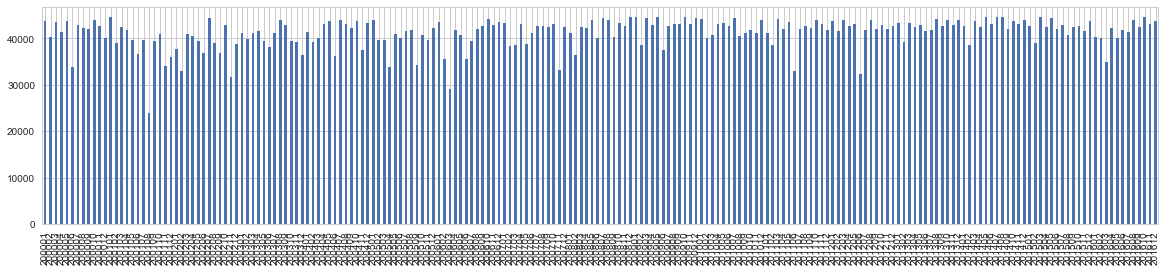

In [6]:
df['year_month'] = df['time'].apply(lambda x: x[3:9])
df['year_month'].value_counts().sort_index().plot(kind='bar', figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0          2
1      22841
2      23621
3      23365
4      23107
5      22714
6      22652
7      22154
8      22104
9      21116
10     21120
11     20244
12     19933
13     19383
14     19140
15     18548
16     18262
17     17980
18     17559
19     17243
20     16888
21     16385
22     15949
23     15600
24     15191
25     14784
26     14567
27     14164
28     13996
29     13500
       ...  
331    24974
332    24140
333    23567
334    23048
335    22737
336    22514
337    21920
338    22323
339    22276
340    22704
341    22894
342    22827
343    23130
344    23369
345    23221
346    23047
347    22594
348    22213
349    22209
350    21754
351    21668
352    21610
353    21465
354    21556
355    21329
356    21651
357    21554
358    22081
359    22273
360    22562
Name: dir, dtype: int64

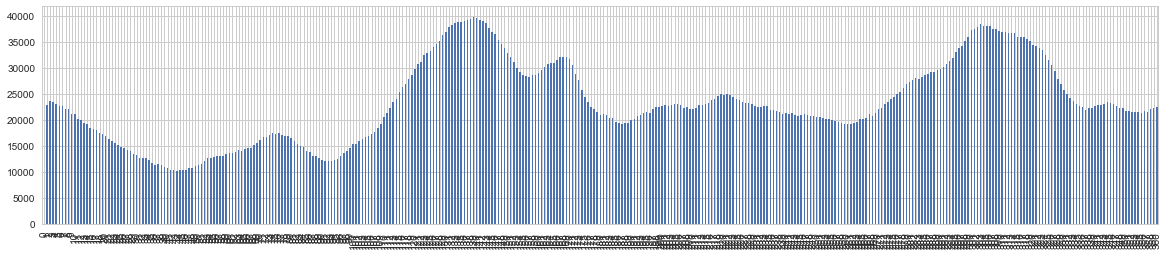

In [7]:
# Drop non-integer data for direction
df.dir = pd.to_numeric(df.dir, errors='coerce')  # Drop not a number
df = df[df.dir == df.dir // 1] # Drop not an integer
df = df[df['dir'].isin(arange(0,361))] # Drop not in range
df['dir'] = df['dir'].apply(lambda x: int(x)) # Convert back to integer
# Need to consider 0

display(df.dir.value_counts().sort_index())
df.dir.value_counts().sort_index().plot(kind='bar', figsize=(20,4))

0        64608
1       205819
2       384489
3       560382
4       689569
5       773299
6       797750
7       778937
8       729960
9       665847
10      588182
11      498969
12      410203
13      327340
14      256598
15      196150
16      146915
17      106785
18       75462
19       52413
20       35374
21       23877
22       15660
23       10256
24        6517
25        4187
26        2521
27        1441
28         853
29         491
         ...  
329          3
330          1
331          1
332          1
333          3
334          3
335          1
336          1
338          2
339          1
340          1
341          2
342          3
343          3
344          1
345          1
346          2
347          4
348          3
349          1
350          1
351          1
352          2
353          3
355          2
356          3
357          4
360          3
1258         1
2158         1
Name: speed, dtype: int64

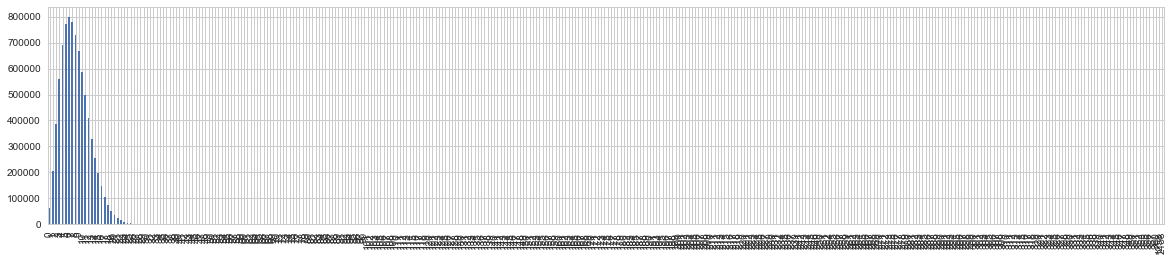

In [8]:
# Drop non-integer data for speed
df.speed = pd.to_numeric(df.speed, errors='coerce')
df = df[df.speed == df.speed // 1]
df['speed'] = df['speed'].apply(lambda x: int(x))

display(df.speed.value_counts().sort_index())
df.speed.value_counts().sort_index().plot(kind='bar', figsize=(20,4))

In [9]:
df.query('(speed > 100) | (speed <0 )')

,stationID,time,vis,day_type,vis2,day_type2,dir,speed,dir_max,speed_max,visual_range,year_month
224968,14922KMSP,MSP2000061504491049,0.079,D,0.109,D,24,251,8,30L60+,NaN,200006
225019,14922KMSP,MSP2000061506561256,0.086,D,0.128,D,24,1258,0.090,D,NaN,200006
225074,14922KMSP,MSP2000061508051405,D,0.126,D,213,8,227,9,30L60+,NaN,200006
225109,14922KMSP,MSP2000061508481448,0.092L60+,0.108,D,198,7,194,7,30L60+,NaN,200006
225154,14922KMSP,MSP2000061509441544,D,0.094,D,181,8,182,8,30L60+,NaN,200006
225462,14922KMSP,MSP2000061515562156,0.475,D,0.441,D,20,2158,0.621,D,NaN,200006
225471,14922KMSP,MSP2000061516092209,D,0.404,D,207,10,211,11,30L60+,NaN,200006
225638,14922KMSP,MSP2000061519090109,0.163,D,D,140,6,137,7,30L60+,NaN,200006
225651,14922KMSP,MSP2000061519230123,0.139L60+,0.188,D,147,5,150,5,30L60+,NaN,200006
225656,14922KMSP,MSP2000061519300130,0.143,D,D,149,5,151,6,30L60+,NaN,200006


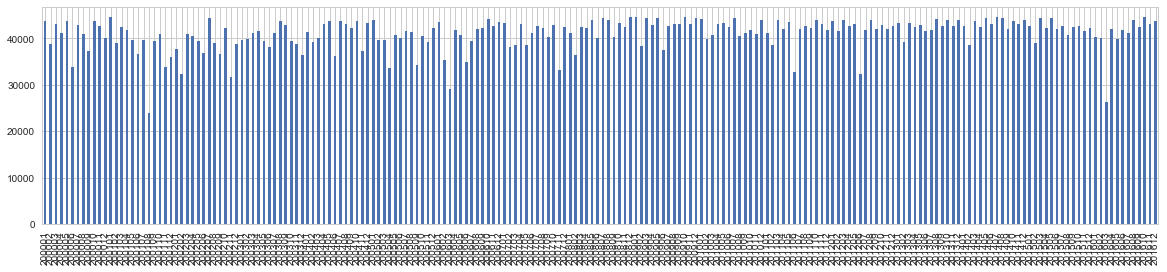

In [10]:
df = df.query('(speed <= 100)  & (speed >= 0)')
df = df[df['day_type'].str.contains("D|N") == True]
df['vis']=pd.to_numeric(df['vis'], errors='coerce')
df = df.dropna(subset=['vis'])

df['year_month'].value_counts().sort_index().plot(kind='bar', figsize=(20,4))

In [11]:
incre = 10
max_speed = 40
max_count = max_count_for_angles(df, start, end, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(0, 360, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title='%s (%s - %s), %s' %(angle, start_angle, end_angle, len(sub_df)) )
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAN4AAAB6CAYAAADQ6u1PAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEsBJREFUeJzt3XtQjfkfB/D36UZTiGnF7my7m1RCFxJtybizSRe3Ssxu
K2q2VSxTLrmVJTY7xpZbwkZiKWvGsotBQ7F0sS65nCgiKkRH99P390fT83N0Op1C39Pp85ox4zzn
+5zn83R6n+/3PM/T8xUxxhgIIW1Kg3cBhHREFDxCOKDgEcIBBY8QDih4hHBAwSOEgw4RvJqaGqxZ
swZDhw7F0KFDsWHDBkilUoXrSCQSuLq6orS0tMk2K1asgLm5ucy/NWvWNNn+3r17mDlzJqytreHi
4oLU1NRW71OD77//vlENu3btarL91atX4eHhASsrK0yZMgXXr18Xnvvnn3+wZMmSFm2/rq4OO3bs
wJgxY2Bra4sZM2YgIyNDbtu7d+9iwIABuHz5sszyCxcuYPLkybCysoKbm1uj58ePH99oH0+ePKn0
+s1tnwvWAaxfv56NHTuWZWVlsYsXLzJHR0cWExOjcJ2IiAi2bds2hW28vLxYbGwsKyoqEv6VlZXJ
bVtRUcGcnZ1ZeHg4E4vFLCYmhg0cOJDl5eW1er8YY2z48OEsJSVFpoby8nK5bZ8+fcpsbW3Z5s2b
mVgsZqtWrWJDhw5lr169EtpMmTKFXb58Went7969m9nb27NTp06xBw8esKioKGZjY8MKCgpk2tXW
1jJPT09mZmbGLl26JCzPyclh/fv3ZzExMSwvL49t3LiRDRo0iD179owxxlhVVRXr168fS09Pl9nH
qqoqpdZvbvu8qH3wKisrmbW1NTt9+rSwLDk5mTk4ODCpVCp3naKiImZjY8NKS0sVvra9vT07f/68
UnWkpKQwBwcHVl1dLSzz9fVl69evV2p9ecrKypiZmRkTi8VKtd+yZQtzd3cXHtfV1bHRo0ezhIQE
mTp9fX2VrmHSpEls+/btMsvGjRvHdu/eLbNs69atbObMmY1+8RcsWMACAgJkavLw8GCnTp1ijNUH
y9zcvMkPk+bWb277vKj9UDMnJwcVFRWwt7cXltnZ2eH58+d4+PCh3HUOHjwIW1tbdOvWrcnXLS4u
RmlpKb766iul6sjMzIStrS20tbWFZUOGDEFWVpaSe9KYWCyGlpYWjI2NlWqflZWFIUOGCI9FIhEG
Dx4sU8PIkSORlZWFO3fuKPWa4eHhmDx5cqPlZWVlwv/v3buHvXv3YvXq1Y3apaenY+LEiTI1JScn
Y8yYMQCA3Nxc9O7dG7q6unK339z6zW2fF7UP3rNnz6Crq4suXboIyz755BMAwNOnT+Wuc+7cOQwf
Plzh64rFYohEIuzcuRMjRozAN998g/j4eNTV1cltX1RUhJ49e8osMzQ0xLNnz1qyO41q0NfXR1hY
GJycnODm5oaUlJQm2ytTQ7du3TBw4ECcP39eqRrs7e3Rq1cv4fG5c+eQl5cHBwcHAIBUKkVYWBiC
g4Nl2gH14Xzx4gW0tbURFBSEr7/+Gt7e3jIfBGKxGDo6OggICICjoyOmT58u1KbM+oq2z5PaB6+i
ogKdOnWSWaajowMAqK6ubtReKpXi1q1bMDU1Vfi69+/fh4aGBoyNjbFjxw74+fkhJiYGcXFxLapD
Xg3Kys3NRWVlJRwcHBAXFwd3d3eEh4fj+PHj71WDqakpbty40eJ6xGIxQkNDMWnSJNjZ2QEA4uLi
oK+vjxkzZjRq/+bNGwBAZGSksA8DBw7Et99+i4KCAmEfX716BU9PT8TFxcHBwQEBAQHIzMxUan1F
2+dJi3cBH1vnzp0b/WI1PJY3fCktLYVUKkX37t2FZXPmzJE5Unf8+HH4+PjAxcUFBgYGAABzc3O8
evUKe/bswdy5c5Wuo3PnznLrdnFxwZMnT4TH8oakixYtQkBAgDAktrCwwKNHj5CQkAAXF5dW12Bg
YID79+/LraspN27cgL+/P/r27Yu1a9cCqA9ifHw8Dh8+DJFI1GgdLa36X79JkyZh5syZAABLS0tc
unQJf/zxBxYsWIDo6GhUVVVBX18fANCvXz/cvn0b+/fvF47ANrW+q6urwu3zpPbB69WrF8rLyyGR
SIQ3r7i4GABgZGTUqH3DG/T2kHHt2rWorKwUHvfs2RMikUgIXQNTU1OUlJRAKpVCU1NT5jkjIyNh
uw2Ki4vl1gAAO3bsQG1trcJ909TUbPQ9tE+fPjh37pzc9srWIJVKoaGh/GDoypUrmDdvHqytrREb
GysE+eTJkygrK2v0HdDf3x/u7u5YsWIFtLW1G40uTExMhA8dbW1tme/FDft4/fp1GBgYKFy/ue0r
OvXzsal98CwsLKCrq4uMjAyMGDECQP25LENDQ7kHJbp37w4tLS28fPlSWCYvHGvXroVYLMbu3buF
ZTdu3MCXX37ZKHQAYGtri+joaNTW1gqf9FevXoWtra3cuj/77LNm9y0oKAjdunUTehgAuHnzJkxM
TOS2t7W1lQklYwyZmZnw8/OTaffy5Uvhe3Bzbt++jblz58Le3h5btmwRhvEA4OvrC1dXV+FxRUUF
3NzcEBkZCUdHR2hpacHa2ho3b97EtGnThHa5ubkYO3YsAMDT0xOjRo1CUFBQo31sbv3mts8V78Oq
bSEiIoKNGjWKXb16laWlpTFHR0eF5+imTp3a6BD5uy5dusQsLCzY9u3bWX5+PktJSWE2Njbszz//
ZIzVnzcqKipiFRUVjDHGJBIJc3R0ZGFhYUwsFrPY2FhmZWXFHj582Or9SklJYZaWluzw4cMsPz+f
7dmzh/Xv359duXKFMVZ/Duztc16FhYXM2tqaRUdHM7FYzFavXs2GDRvGXr9+LfO6Hh4eLD4+njFW
f/6xqKiI1dbWyq3B3d2djRs3jhUUFDR7PlMikTQ6nH/27FnWv39/lpSUxPLy8lhUVBSztrZmjx49
YozVnwIZNGiQcJ5w06ZNMuc/m1u/ue3zImKsffwhbFNXQyijuroae/fuxaVLl6CtrQ1nZ2d4eXk1
OZxKTk7GvXv3EBoaqvB1//33XyQnJ6OwsBDdu3eHq6srRo8eDaB+CBccHIx58+YJPW1eXh7i4+OR
n58PIyMj+Pr6wsrKqtX7BQCnT5/GiRMnUFJSAiMjI0ybNk04ZXDr1i1ERkZi+fLlsLS0BFDfK//+
++949uwZjI2N8d1338n0kOXl5Zg3bx42bNiA3r174/z589i+fTs2b97cqBd8+vQpFi5cKLcuFxcX
4XtXg8rKSvj5+cnUAwBpaWk4cuQISkpK8Pnnn8PX1xcWFhYA6of8R48exfnz51FaWtro+ebWV2b7
H8rgwYOVb8w7+cq6evVqm23r6dOnzNramhUXF7d43bas8300VWdSUhKbPXu2zDJ/f/9W/Sw+hPb+
82yK2p9OaA0jIyN4eHjg4MGDvEtpU4wxHDhwAIGBgcKyzMxMaGhowNDQkGNl6oeC14SFCxfir7/+
UniRtLo5efIkzMzMMGzYMGGZlZUVtm7dyrEq9aT2RzVbq0uXLk2eiFZXEydOlLn8Cvj/uTbyYVGP
RwgHFDxCOKDgEcIBBY8QDih4hHBAwSOEAwoeIRxQ8AjhgIJHCAcUPEI4oOARwgEFjxAOKHiEcEDB
I4QDpYL3/PlzjBgxArm5ucjPz4e3tzd8fHywcuVK4W5chw4dgqenJ6ZPn46zZ88CqP9T+x9//BE+
Pj7w9/fHixcvAADZ2dmYNm0avLy88Ntvv32kXSNEdTUbvJqaGqxYsUK4Zdu6desQEhKCxMREMMZw
5swZFBcXIyEhAUlJSdi1axc2bdqE6upqHDhwAGZmZkhMTIS7uztiY2MBACtXrkR0dDQOHDiAa9eu
4datWx93Lwl

In [12]:
df['HrMn'] = df['time'].apply(lambda x: x[11:15])
df['date'] = df['time'].apply(lambda x: x[3:11])
df['time'] = df['date'].apply(lambda x: x[3:])

df=df[['stationID','date','HrMn', 'vis','day_type','dir','speed','dir_max','speed_max']]
df.to_csv(save_file_dir + '/minute_avg.csv', index=False)

# 2. US 1 min to Hour avg

In [13]:
print(file_dir)

MSP


In [14]:
df = pd.read_csv(save_file_dir + '/minute_avg.csv', header=0, skipinitialspace=True, dtype={'HrMn': object})

df['speed']=pd.to_numeric(df['speed'], errors='coerce')
df['dir']=pd.to_numeric(df['dir'], errors='coerce')
df['speed_max']=pd.to_numeric(df['speed_max'], downcast='integer', errors='coerce')
df = df.dropna()
df=df[['date','HrMn','dir','speed','speed_max']]
df

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,HrMn,dir,speed,speed_max
0,20000101,0000,255,7,9.0
1,20000101,0001,254,8,8.0
2,20000101,0002,253,7,8.0
3,20000101,0003,252,7,8.0
4,20000101,0004,249,7,8.0
5,20000101,0005,245,8,8.0
6,20000101,0006,245,8,9.0
7,20000101,0007,248,8,9.0
8,20000101,0008,250,8,10.0
9,20000101,0009,250,8,10.0


In [15]:
df['Hr']=df['HrMn'].apply(lambda x: int(str(x)[:-2]))
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)
temp_df = df.groupby(['date', 'Hr']).agg({'x' : np.mean,'y': np.mean,'speed_max': np.max}).reset_index()
temp_df['speed']=np.sqrt(temp_df.x**2 + temp_df.y**2)
temp_df['dir']=np.degrees(np.arctan2(temp_df.y, temp_df.x))%360
temp_df['HrMn']=temp_df['Hr'].apply(lambda x: "%02d00"%x)
temp_df.drop(['Hr', 'x','y'], 1, inplace=True)

## Time Comparison

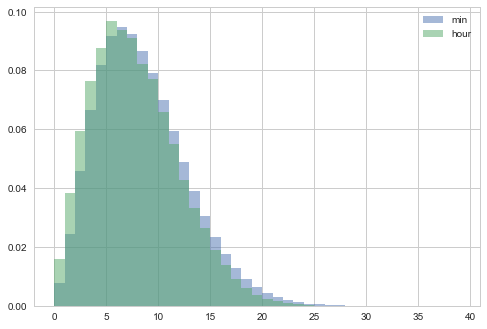

In [16]:
bins=arange(0,40)
df['speed'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['speed'].hist(bins=bins, normed=True,alpha=0.5,label='hour')
plt_configure(legend=True)

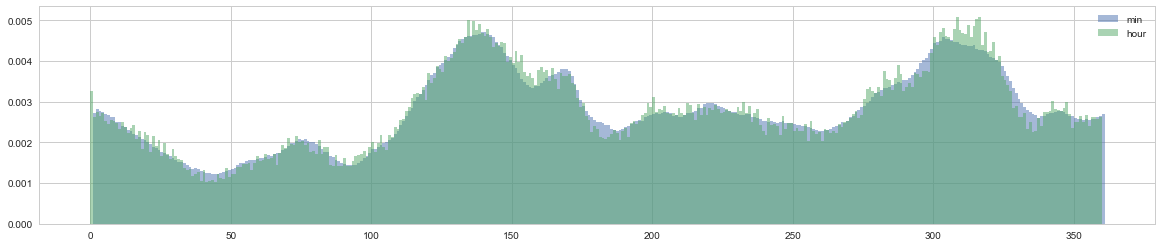

In [17]:
bins=arange(0,362)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='hour')
plt_configure(legend=True, figsize=(20,4))

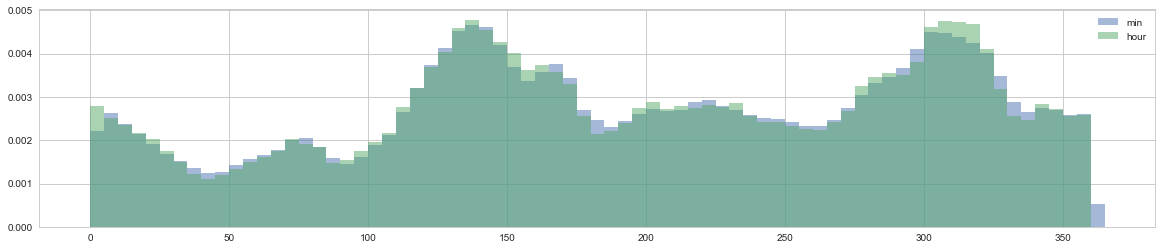

In [18]:
bins=arange(0,370,5)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='hour')
plt_configure(legend=True, figsize=(20,4))

## Resample Comparison

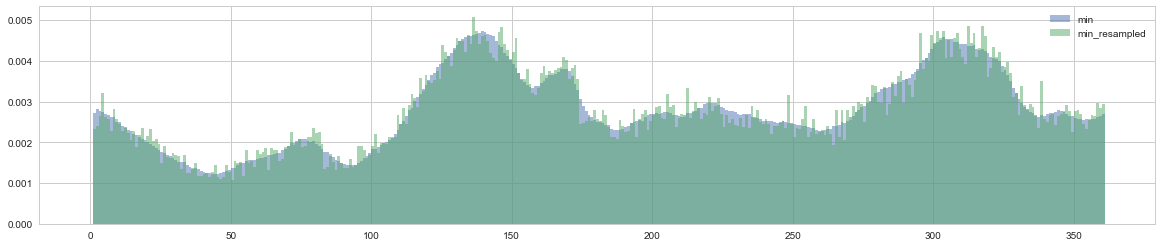

In [19]:
bins=arange(0,362)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
df.sample(n=50000, replace=True)['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min_resampled')
plt_configure(legend=True, figsize=(20,4))

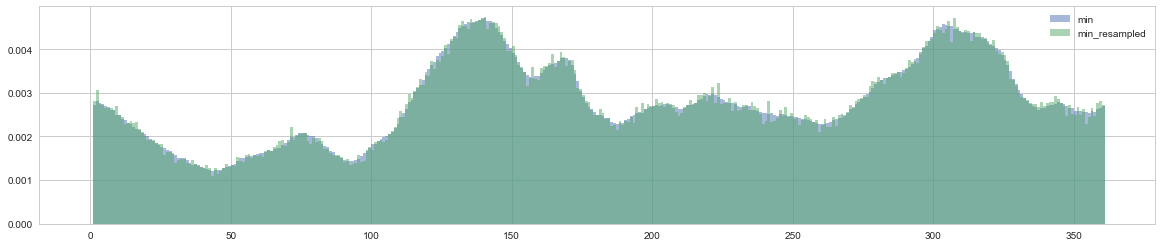

In [20]:
bins=arange(0,362)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
df.sample(n=300000, replace=True)['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min_resampled')
plt_configure(legend=True, figsize=(20,4))

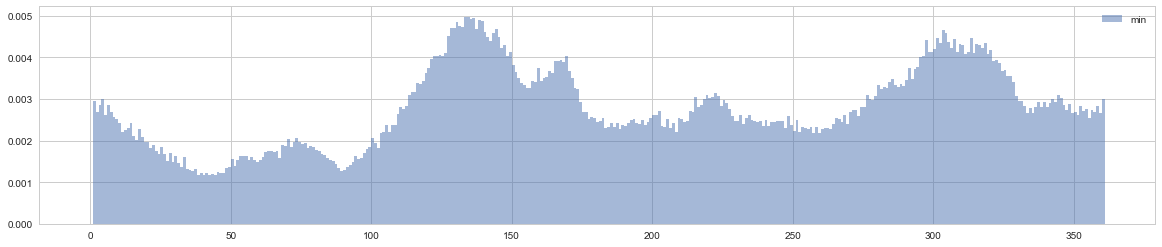

In [21]:
bins=arange(0,362)
df.query('date >= 20100000').sample(n=300000, replace=True)['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
plt_configure(legend=True, figsize=(20,4))

## Direction Comparison

In [22]:
incre = 10
max_speed = temp_df.speed.max()

for angle in arange(0, 360, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, _ = select_df_by_angle(df, start_angle, end_angle)
    sub_df_hourly, _ = select_df_by_angle(temp_df, start_angle, end_angle)   
    bins = arange(0, max_speed)

    fig = plt.figure()
    sub_df['speed'].hist(bins=bins, alpha=0.5, label='min', normed=True)
    sub_df_hourly['speed'].hist(bins=bins, alpha=0.5, label='hour', normed=True)
    plt.gca().set_xlim([0, max_speed])
    plt_configure(figsize=(3,1.5), legend=True, title='%s (%s - %s), %s/%s' %(angle, start_angle, end_angle, len(sub_df),len(sub_df_hourly)))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANAAAAB6CAYAAADOI938AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFoxJREFUeJztnXlQVFf2x7+NLFKCQpWmdTRExSCyg4oiLhPiMgaMgKIS
GRMxBKxyxpHKjDgRF2i3RCfjJOjginEyaiQNU0MU1AS1AiKi6KCgoVFQDGsUQrPTnN8fFO/Hs1d9
YNPt/VR1Fe+8e989p+nz7n33nvuOiIgIDAbjhTDRtwIMhiHDHIjBEABzIAZDAMyBGAwBMAdiMATA
HIjBEIDeHKi9vR1xcXGYMmUKpkyZgk8//RQKhUJjHblcjgULFqCurk5tmU2bNmH8+PG8T1xcnNry
xcXFWL58Odzd3eHv74/Lly+/sE3drFq1SkmHw4cPqy2fl5eHoKAguLm5YdGiRSgoKODOnTt3Dhs2
bHiu9js7O3HgwAHMnj0bnp6eWLp0Ka5fv66y7E8//QQXFxdcvXqVJ//xxx/x7rvvws3NDQsXLlQ6
P2/ePCUb09PTla6flpaG4OBgtbqqax8Ali5diry8PHR0dGD37t2YPn06PDw88OGHH+L+/ftcuWf1
6P70/N6kUinmzZsHT09PhISEIDc397nsVQvpiZ07d9KcOXMoPz+fsrKyyNfXlxISEjTWiY+Pp3/+
858ayyxbtoz27dtH1dXV3KehoUFl2ebmZpo5cybFxsaSTCajhIQEcnV1pdLS0he2i4hoxowZlJKS
wtOhqalJZdnKykry9PSkvXv3kkwmoy1bttCUKVOovr6eK7No0SK6evWqzu0fPXqUvL296fz58/Tg
wQPatWsXeXh4UHl5Oa9cR0cHBQcHk4ODA+Xk5HDyoqIicnZ2poSEBCotLaXPPvuMvLy8qKqqioiI
WltbacKECXTlyhWeja2trbzr//jjj+Tu7k5BQUEq9VTXPhHRr7/+SpMmTaL29nb6/PPPadasWXTl
yhW6f/8+rVu3jvz8/Ki9vZ2IiKdDdXU1ffvtt+Ts7EwFBQVERJSdnU2urq6UlpZGZWVl9Nlnn5GH
hwdVVlbqZK8m9OJALS0t5O7uThcuXOBkUqmUfHx8SKFQqKxTXV1NHh4eVFdXp/Ha3t7edOnSJZ30
SElJIR8fH2pra+NkYWFhtHPnTp3qq6KhoYEcHBxIJpPpVP6LL76gwMBA7rizs5PefvttOn78OE/P
sLAwnXUICAigxMREnmzu3Ll09OhRnmz//v20fPlypR/wunXrKCoqiqdTUFAQnT9/noi6fnDjx49X
e1Mg6rpBOjs7U0BAgFoHUtc+EVFGRgZFRkYSEdGePXvo3Llz3LmioiJycHCghw8fKl2zsbGRZsyY
Qfv37+dk8fHxFB4ezrPHxcWF0tPTdbJXE3oZwhUVFaG5uRne3t6cbNKkSfjll1/w8OFDlXVOnToF
T09PDBkyRO11a2pqUFdXhzFjxuikx40bN+Dp6QkzMzNONnnyZOTn5+toiTIymQympqaws7PTqXx+
fj4mT57MHYtEIkycOJGnw1tvvYX8/Hzcu3dPp2vGxsbi3XffVZI3NDRwfxcXF+PYsWPYunWrUrkr
V65g/vz5PJ2kUilmz54NACgpKcGIESNgaWmpVoecnBwcO3YMc+fOVXleU/sAkJWVhenTpwMAoqOj
MWfOHABAfX09vvrqK4wePRojRoxQqnf06FGYmZkhPDyck9na2uLWrVu4c+cOiAhSqRREBAcHB53s
1YReHKiqqgqWlpawtrbmZMOGDQMAVFZWqqxz8eJFzJgxQ+N1ZTIZRCIRDh48iFmzZuGdd97BkSNH
0NnZqbJ8dXU1XnvtNZ5s6NChqKqqeh5zlHSwsrJCTEwMpk+fjoULFyIlJUVteV10GDJkCFxdXXHp
0iWddPD29sbw4cO544sXL6K0tBQ+Pj4AAIVCgZiYGKxdu5ZXDuhysidPnsDMzAxr1qzBtGnTEBoa
ynNomUwGc3NzREVFwdfXF0uWLFHSLSUlBRMnTlSpn6b2u8nKysK0adN4skOHDsHb2xtpaWnYunUr
TE1NeedbWlpw7NgxREZGwtzcnJOvWLECrq6uCA4OhrOzMzZu3Ihdu3ZhzJgxOtmrCb04UHNzMyws
LHiyboPb2tqUyisUChQWFmLcuHEar3v//n2YmJjAzs4OBw4cQHh4OBISEnDo0KHn0kOVDrpSUlKC
lpYW+Pj44NChQwgMDERsbCy+++47QTqMGzcOt2/ffm59ZDIZ1q9fj4CAAEyaNAlA1w/RysoKS5cu
VSrf2NgIAJBIJJwNrq6u+OCDD1BeXs7ZWF9fj+DgYBw6dAg+Pj6IiorCjRs3dNJJU/sA8OjRIygU
CowdO5YnnzdvHqRSKYKCgrB69WqUlJTwzqelpcHExAQLFy7kyaurq9HQ0IC4uDicPn0a77//PjZt
2oTi4mKd7NWEqdYSfcDAgQOVfiDdx6qGBXV1dVAoFLC1teVkH374IW9m6bvvvsN7770Hf39/2NjY
AOianamvr0dSUhI++ugjnfUYOHCgSr39/f3x888/c8eq7lIff/wxoqKiuKGmo6MjHj16hOPHj8Pf
3/+FdbCxseHNPOnC7du3ERERgTfffBPbtm0D0OVQR44cQXJyMkQikVKd7rt6QEAAli9fDgBwcnJC
Tk4OTp8+jXXr1mHPnj1obW2FlZUVAGDChAm4e/cuvv76a3h5eWnUSVv7QNeM2LO9DwC8/vrrAIAt
W7bg+vXrSE5Oxvr167nzZ86cwfz585VuSJs3b4avry/nsM7OzigsLMThw4fx8ccfa7VXE3pxoOHD
h6OpqQlyuZz7J9TU1AAAxGKxUvnuL7rnUGzbtm1oaWnhjl977TWIRCLOeboZN24camtroVAoMGDA
AN45sVjMtdtNTU2NSh0A4MCBA+jo6NBo24ABA5Se0+zt7XHx4kWV5XXVQaFQwMRE9wHDtWvXEBkZ
CXd3d+zbt49zyPT0dDQ0NCg9I0VERCAwMBCbNm2CmZmZUm8/duxY7uZhZmbGe27strHn9Ls6tLUf
FxeH7Oxs7pmks7MTmZmZcHFx4b4TkUgEe3t7PH36lKvf1NSE3NxcREREKLVZUFCAsLAwnszFxQW3
bt2CjY2NVns1oZchnKOjIywtLXk9SF5eHoYOHary4dvW1hampqa8L0wsFuONN97gPqampti2bRtW
rlzJq3v79m2MHj1ayXkAwNPTE/n5+TynyMvLg6enp0q9R44cyWtTFWvWrMEnn3zCk925c0dpONJT
h7y8PO6YiLjJjZ48ffqUe07Uxt27d/HRRx9h8uTJSExM5PXqYWFhOHv2LFJTU5GamooTJ04A6BrC
rF27FqampnB3d8edO3d41ywpKeF6gODgYHz55Zc629gTbe0rFArk5uZyz2smJiaIi4uDVCrlrqFQ
KFBUVMT70RcWFoKIVPaAYrEYMpmMJ5PJZLCzs9PJXo1onafrI+Lj48nPz4/y8vIoOzubfH19Na7x
LF68WGlq9llycnLI0dGREhMTqaysjFJSUsjDw4P+85//EFHXukN1dTU1NzcTEZFcLidfX1+KiYkh
mUxG+/btIzc3N5XTo7qSkpJCTk5OlJycTGVlZZSUlETOzs507do1IupaQ+m5ZlJRUUHu7u60Z88e
kslktHXrVpo6dSr9+uuvvOsGBQXRkSNHiKhr/aq6upo6OjpU6hAYGEhz586l8vJyrethcrlcaRo5
MzOTnJ2d6eTJk1RaWkq7du0id3d3evToERF1Tb17eXlx60x/+9vf1K6f/eMf/1A7ja2q/fz8fAoO
DuaVOXjwINeeTCajmJgY8vX15X1H//rXv2ju3Lkq20hKSiIPDw9uHSgxMZGcnJyoqKhIJ3s1ISLS
z4a61tZWSCQ

2000 - 2004


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


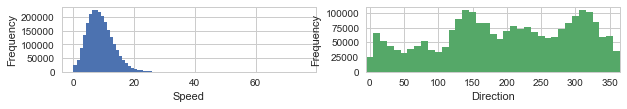

2005 - 2009


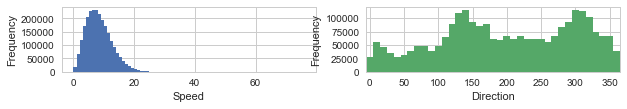

2010 - 2014


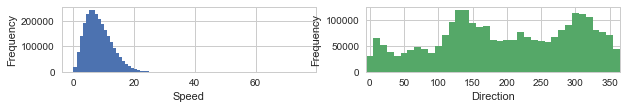

2015 - 2016


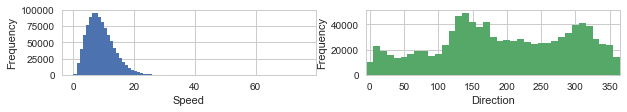

2000 - 2004


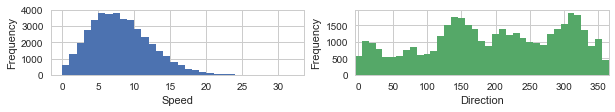

2005 - 2009


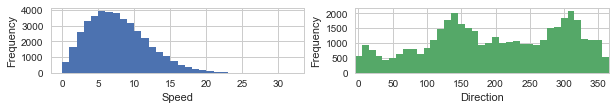

2010 - 2014


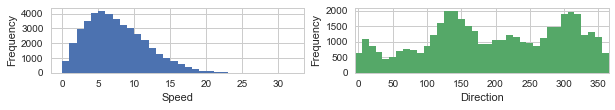

2015 - 2016


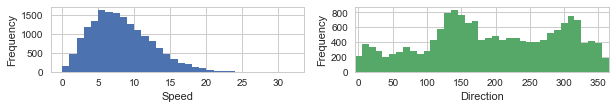

In [24]:
check_time_shift(df)
check_time_shift(temp_df)

In [25]:
temp_df.to_csv(save_file_dir + '/hr_avg.csv', index=False, float_format='%.2f')

In [26]:
sss

NameError: name 'sss' is not defined

# 3. Read from Chinese Data sets

In [ ]:
import csv

ipath= "./data/NCDC/cn/上海/上海/dat.txt"
uipath = unicode(ipath , "utf8")

with open(uipath) as fin, open('./data/NCDC/test.txt', 'w') as fout:
    o=csv.writer(fout)
    for line in fin:
        o.writerow(line.split())